In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns


In [2]:
df1=pd.read_csv(r"C:\Users\Shaivy\Desktop\inductions\databyte\house price\Melbourne_housing_FULL.csv")
print(df1.head(10))

       Suburb             Address  Rooms Type      Price Method  SellerG   
0  Abbotsford       68 Studley St      2    h        NaN     SS   Jellis  \
1  Abbotsford        85 Turner St      2    h  1480000.0      S   Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S   Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB   Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP   Biggin   
5  Abbotsford    40 Federation La      3    h   850000.0     PI   Biggin   
6  Abbotsford         55a Park St      4    h  1600000.0     VB   Nelson   
7  Abbotsford        16 Maugie St      4    h        NaN     SN   Nelson   
8  Abbotsford        53 Turner St      2    h        NaN      S   Biggin   
9  Abbotsford        99 Turner St      2    h        NaN      S  Collins   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea   
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN  \
1  

In [3]:
df1.shape


(34857, 21)

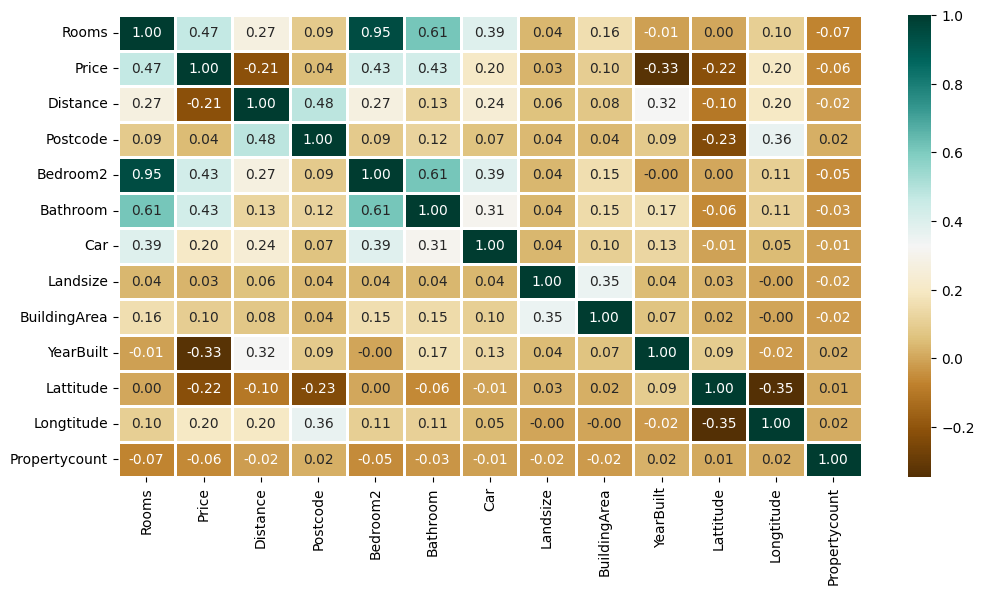

In [4]:
# Assuming df1 is your DataFrame containing both numeric and non-numeric data
# Remove non-numeric columns (assuming they are categorical)
numeric_df = df1.select_dtypes(include=[np.number])

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

# Display the plot
plt.show()

In [7]:
df1.isnull().sum()


Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [32]:
df2=df1.drop(['Lattitude','Longtitude','Method','Address','Type','Date','Postcode','SellerG'],axis='columns')
df2['Price'] = df2['Price'].fillna(df2['Price'].mean())
df2['Bedroom2'] = df2['Bedroom2'].fillna(df2['Bedroom2'].median())
df2['Landsize'] = df2['Landsize'].fillna(df2['Landsize'].mean())
df2['BuildingArea'] = df2['BuildingArea'].fillna(df2['BuildingArea'].mean())
df2['Car'] = df2['Car'].fillna(df2['Car'].median())
df2['YearBuilt'] = df2['YearBuilt'].fillna(df2['YearBuilt'].median())
df2['Bathroom'] = df2['Bathroom'].fillna(df2['Bathroom'].median())

df2.dropna(axis=1)
df2.head()


,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,1.050173e+06,2.5,2.0,1.0,1.0,126.0,160.2564,1970.0,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,2,1.480000e+06,2.5,2.0,1.0,1.0,202.0,160.2564,1970.0,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,2,1.035000e+06,2.5,2.0,1.0,0.0,156.0,79.0000,1900.0,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,3,1.050173e+06,2.5,3.0,2.0,1.0,0.0,160.2564,1970.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,1.465000e+06,2.5,3.0,2.0,0.0,134.0,150.0000,1900.0,Yarra City Council,Northern Metropolitan,4019.0


In [30]:
df2.isnull().sum()

Suburb           0
Rooms            0
Price            0
SellerG          0
Distance         1
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      3
Regionname       3
Propertycount    3
dtype: int64

In [36]:


# Convert the "price" column to integer type
df2['Price'] = df2['Price'].astype(int)

df2.head()


,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,1050173,2.5,2.0,1.0,1.0,126.0,160.2564,1970.0,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,2,1480000,2.5,2.0,1.0,1.0,202.0,160.2564,1970.0,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,2,1035000,2.5,2.0,1.0,0.0,156.0,79.0000,1900.0,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,3,1050173,2.5,3.0,2.0,1.0,0.0,160.2564,1970.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,1465000,2.5,3.0,2.0,0.0,134.0,150.0000,1900.0,Yarra City Council,Northern Metropolitan,4019.0


In [44]:
df3 = df2[df2['BuildingArea'] < df2['Landsize']] #building area cannot be greater than landsize so some anomaly in data
df3.head()

,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
1,Abbotsford,2,1480000,2.5,2.0,1.0,1.0,202.0,160.2564,1970.0,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,2,1035000,2.5,2.0,1.0,0.0,156.0,79.0000,1900.0,Yarra City Council,Northern Metropolitan,4019.0
7,Abbotsford,4,1050173,2.5,3.0,2.0,2.0,400.0,220.0000,2006.0,Yarra City Council,Northern Metropolitan,4019.0
8,Abbotsford,2,1050173,2.5,4.0,1.0,2.0,201.0,160.2564,1900.0,Yarra City Council,Northern Metropolitan,4019.0
9,Abbotsford,2,1050173,2.5,3.0,2.0,1.0,202.0,160.2564,1900.0,Yarra City Council,Northern Metropolitan,4019.0


In [82]:
df4 = df3[df3['Bathroom']+2 > df3['Bedroom2']]

df4.head(10)
has_nan = df4.isna().any().any()

print(has_nan)  # Output: True
df5 = df4.dropna(axis=0)
has_nan = df5.isna().any().any()
print(has_nan)

True
False


In [83]:
from sklearn.preprocessing import LabelEncoder


In [84]:
le_Suburb=LabelEncoder()
le_Regionname=LabelEncoder()
le_CouncilArea=LabelEncoder()

In [85]:
df4['Suburb_n']=le_Suburb.fit_transform(df4['Suburb'])
df4['Regionname_n']=le_Suburb.fit_transform(df4['Regionname'])
df4['CouncilArea_n']=le_Suburb.fit_transform(df4['CouncilArea'])

C:\Users\Shaivy\AppData\Local\Temp\ipykernel_4368\1789706778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Suburb_n']=le_Suburb.fit_transform(df4['Suburb'])
C:\Users\Shaivy\AppData\Local\Temp\ipykernel_4368\1789706778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Regionname_n']=le_Suburb.fit_transform(df4['Regionname'])
C:\Users\Shaivy\AppData\Local\Temp\ipykernel_4368\1789706778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [86]:
df5=df4.drop(['Suburb','Regionname','CouncilArea'],axis='columns')
df5.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,Suburb_n,Regionname_n,CouncilArea_n
1,2,1480000,2.5,2.0,1.0,1.0,202.0,160.2564,1970.0,4019.0,0,2,31
2,2,1035000,2.5,2.0,1.0,0.0,156.0,79.0000,1900.0,4019.0,0,2,31
7,4,1050173,2.5,3.0,2.0,2.0,400.0,220.0000,2006.0,4019.0,0,2,31
9,2,1050173,2.5,3.0,2.0,1.0,202.0,160.2564,1900.0,4019.0,0,2,31
10,2,941000,2.5,2.0,1.0,0.0,181.0,160.2564,1970.0,4019.0,0,2,31


In [89]:
X = df5.drop(['Price'], axis=1)
X.dropna(inplace=True)

# Update y values to match the corresponding rows in X
y = df5.loc[X.index, 'Price']
print(X.shape)
print(y.shape)

(18691, 12)
(18691,)


In [90]:
from sklearn.model_selection import train_test_split
X_train, Xx_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=10)
from sklearn.linear_model import LinearRegression
lr_clf= LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score (Xx_test,y_test)

0.31723290626978495

In [91]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)
dt_regressor.score(Xx_test, y_test)

0.030687503955897255

In [92]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
rf_regressor.score(Xx_test, y_test)

0.4269545650178773

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming you already have X and y datasets

# Split the data into training and testing sets
X_train, Xx_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Create and train the RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(Xx_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R2 score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


R2 score: 0.43
Mean Absolute Error: 255828.97
Mean Squared Error: 164038142416.30
Root Mean Squared Error: 405016.22


In [94]:
df5['Car'].unique()

array([ 1.,  0.,  2.,  5.,  4.,  3.,  6.,  8.,  7., 10., 18., 12.,  9.])

In [99]:
df5['YearBuilt'].unique()

array([1970., 1900., 2006., 2009., 1890., 1925., 2005., 1880., 1985.,
       1930., 2016., 1950., 1980., 2011., 2015., 2013., 2012., 2003.,
       1975., 1995., 2010., 1960., 1910., 1990., 2004., 1962., 1955.,
       1988., 1997., 1965., 2007., 2014., 1996., 1889., 1920., 1915.,
       1953., 2000., 1998., 1978., 1940., 1935., 1945., 1958., 2017.,
       2008., 1999., 1992., 1977., 1919., 1976., 1948., 1926., 1938.,
       1943., 1967., 1968., 1936., 1974., 1928., 2002., 1952., 1994.,
       1964., 2001., 1905., 1927., 1918., 1991., 1993., 1969., 2018.,
       1897., 1986., 1983., 1937., 1972., 1903., 1830., 1908., 1913.,
       1923., 1854., 1885., 1941., 1951., 1982., 1946., 1904., 1934.,
       1901., 1987., 1949., 1921., 1929., 1887., 1979., 1917., 1906.,
       1989., 1973., 1957., 1971., 1912., 1875., 1860., 1888., 1911.,
       1863., 1857., 1868., 1984., 1907., 1954., 1924., 1939., 1963.,
       1966., 1916., 1886., 1896., 1892., 1891., 1862., 1981., 1870.,
       1922., 1895.,

In [100]:
df6 = df5[df5['Car']<3 ]
df7=df6[df6['YearBuilt']>1990 ]

In [103]:
df7['YearBuilt'].unique()
X = df7.drop(['Price'], axis=1)
X.dropna(inplace=True)

# Update y values to match the corresponding rows in X
y = df7.loc[X.index, 'Price']
print(X.shape)
print(y.shape)

(2228, 12)
(2228,)


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming you already have X and y datasets

# Split the data into training and testing sets
X_train, Xx_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Create and train the RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(Xx_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R2 score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


R2 score: 0.60
Mean Absolute Error: 211022.39
Mean Squared Error: 119033510993.34
Root Mean Squared Error: 345012.33


In [105]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
rf_regressor.score(Xx_test, y_test)

0.6133989521029337

In [106]:
from sklearn.model_selection import train_test_split
X_train, Xx_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=10)
from sklearn.linear_model import LinearRegression
lr_clf= LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score (Xx_test,y_test)

0.5078712986526017